# House Price Prediction

## Introduction


- A predictive modeling process also known as *Knowledge Discovery of Dataset* involves four itervative steps:

  1. Define the Problem
  2. Data Preparation
  3. Evaluate Model
  4. Finalize Model

## Knowledge Discovery of Dataset

#### **Loading the Datasets**

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [ ]:
#creating  a kaggle folder
! mkdir ~/.kaggle

#copy the kaggle.json file  to the folder created
! cp kaggle.json ~/.kaggle/

#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

# downloading data set using API
!kaggle competitions download -c house-prices-advanced-regression-techniques;

!unzip house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 96.0MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# import neccessary liraries

import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shutil

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use("fivethirtyeight")

In [ ]:
# Load the datasets in working space

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
display(train_data.head().style.set_caption("Training Data"))

print(f"\n{'_' * shutil.get_terminal_size().columns}\n") # displays horizontal line to separate out dfs

display(test_data.head().style.set_caption("Test Data"))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000



________________________________________________________________________________



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,nan,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,nan,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,nan,nan,nan,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,nan,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,nan,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,nan,nan,nan,0,1,2010,WD,Normal


In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# train_data.info()

# print(f"\n{'_' * shutil.get_terminal_size().columns}\n") # displays horizontal line to separate out dfs

# test_data.info()

In [ ]:
# Set Id column as index of both train and test data
train_data = train_data.set_index('Id')
test_data = test_data.set_index('Id')

In [ ]:
print(f"train data shape: {train_data.shape}")

print(f"test  data shape: {test_data.shape}")

train data shape: (1460, 80)
test  data shape: (1459, 79)


In [ ]:
# define target variable

target = [col for col in train_data.columns if col not in test_data.columns][0]

print(f"Target variable: '{target}'")

Target variable: 'SalePrice'


In [ ]:
print("\033[1mTraining Data Description\033[0m\n\n") # using "\033[1m" makes text bold
display(train_data.describe())

print(f"\n{'_' * shutil.get_terminal_size().columns}\n") # displays horizontal line to separate out dfs

print("\033[1mTest Data Description\033[0m\n\n") # using "\033[1m" makes text bold
display(test_data.describe())

Training Data Description




,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



________________________________________________________________________________

Test Data Description




,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


The datasets contain variables of different dtypes. Looking at the values of the variables and using intuition they can be classified into 4 different groups of features:
1. Numerical Discrete
2. Numerical Continuous
3. Categorical Ordinal
4. Categorical Nominal

In [ ]:
# All categorical nomial variables
cat_nom = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
           'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
           'GarageType', 'GarageFinish', 'MoSold', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# All categorical ordinal variables
cat_ord = ['Utilities', 'LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# All numerical continous variables
num_con = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
           '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# All numerical discrete variables
num_dis = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']

# All numeric and categorical columns
numeric_columns = num_con + num_dis
categorical_columns  = cat_ord + cat_nom

### 1_2 Data Visualisations

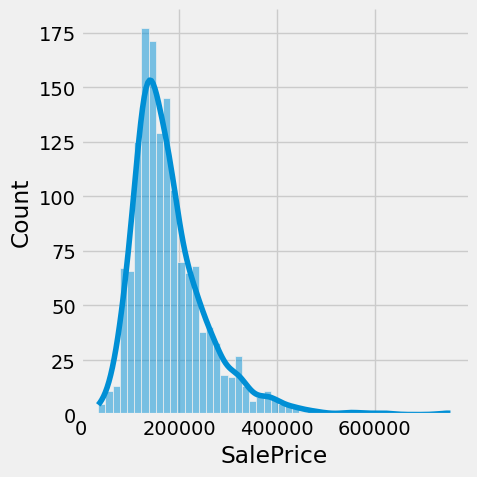

In [ ]:
sns.displot(x=train_data['SalePrice'], kde=True)
plt.show()

In [ ]:
# Sneak peek into SalePrice
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalePrice shows the following properties:

- Deviation from the normal distribution.
- Appreciable right skewness.
- Show peakedness

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The skewness and kurtosis scores indicate that SalePrice is positive skewed with data points concentrating on the left tail. The kurtosis score shows that the distribution has heavier tails and a sharper peak.

In [ ]:
def visualise_data(data, list_cols, plot_type, display_corr_score=False, **kwargs):

    if plot_type not in  ["scatterplot", "histplot", "countplot"]:
        print(f"Invalid plot_type specified: Can only show [scatterplot, histplot, countplot]")
        return

    num_plots = len(list_cols)
    num_cols = 4
    num_rows = -(-num_plots // num_cols) # Using negative signs here ensures that total rows are enough to accomodate all plots

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), **kwargs)

    # Loop through the list of columns (plots) and enumerate them along with their index (idx).
    for idx, column in enumerate(list_cols):
        row = idx // num_cols
        col = idx % num_cols

        # Access the subplot (axis) at the calculated row and column position.
        ax = axes[row, col]

        if plot_type == "scatterplot":
            sns.scatterplot(x=data[column], y=data['SalePrice'], ax=ax)
            ax.set_ylabel(target, fontsize=14)
            ax.set_xlabel(column, fontsize=14)
            if display_corr_score == True:
                correlation = data[column].corr(data['SalePrice'])

                # Display the correlation score as text on the plot at a specific position.
                ax.text(.8, .9, f'corr: {correlation:.2f}', transform=ax.transAxes, fontsize=12, ha='center')

        elif plot_type == "histplot":
            sns.histplot(x=data[column], ax=ax)
            ax.set_xlabel(column, fontsize=14)
            ax.set_ylabel(" ")

        elif plot_type == "countplot":
            sns.countplot(x=data[column], ax=ax)

            # Rotate and align the x-axis tick labels for better readability.
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

            # set ylabel to emoty string
            ax.set_ylabel(" ")
            ax.set_xlabel(column, fontsize=14)

    for idx in range(num_plots, num_rows * num_cols):

        # Remove the subplot (axis) at the current index from the figure (fig).
        fig.delaxes(axes.flatten()[idx])

    # Set the figure title based on plot type
    if plot_type == "scatterplot":
        fig.suptitle(f"Scatterplot of Continuous Numerical features With {target}", fontsize=16)

    elif plot_type == "histplot":
        fig.suptitle("Histograms of Numerical Discrete features", fontsize=16)

    elif plot_type == "countplot":
        fig.suptitle("Countplot of Categorical features", fontsize=16)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

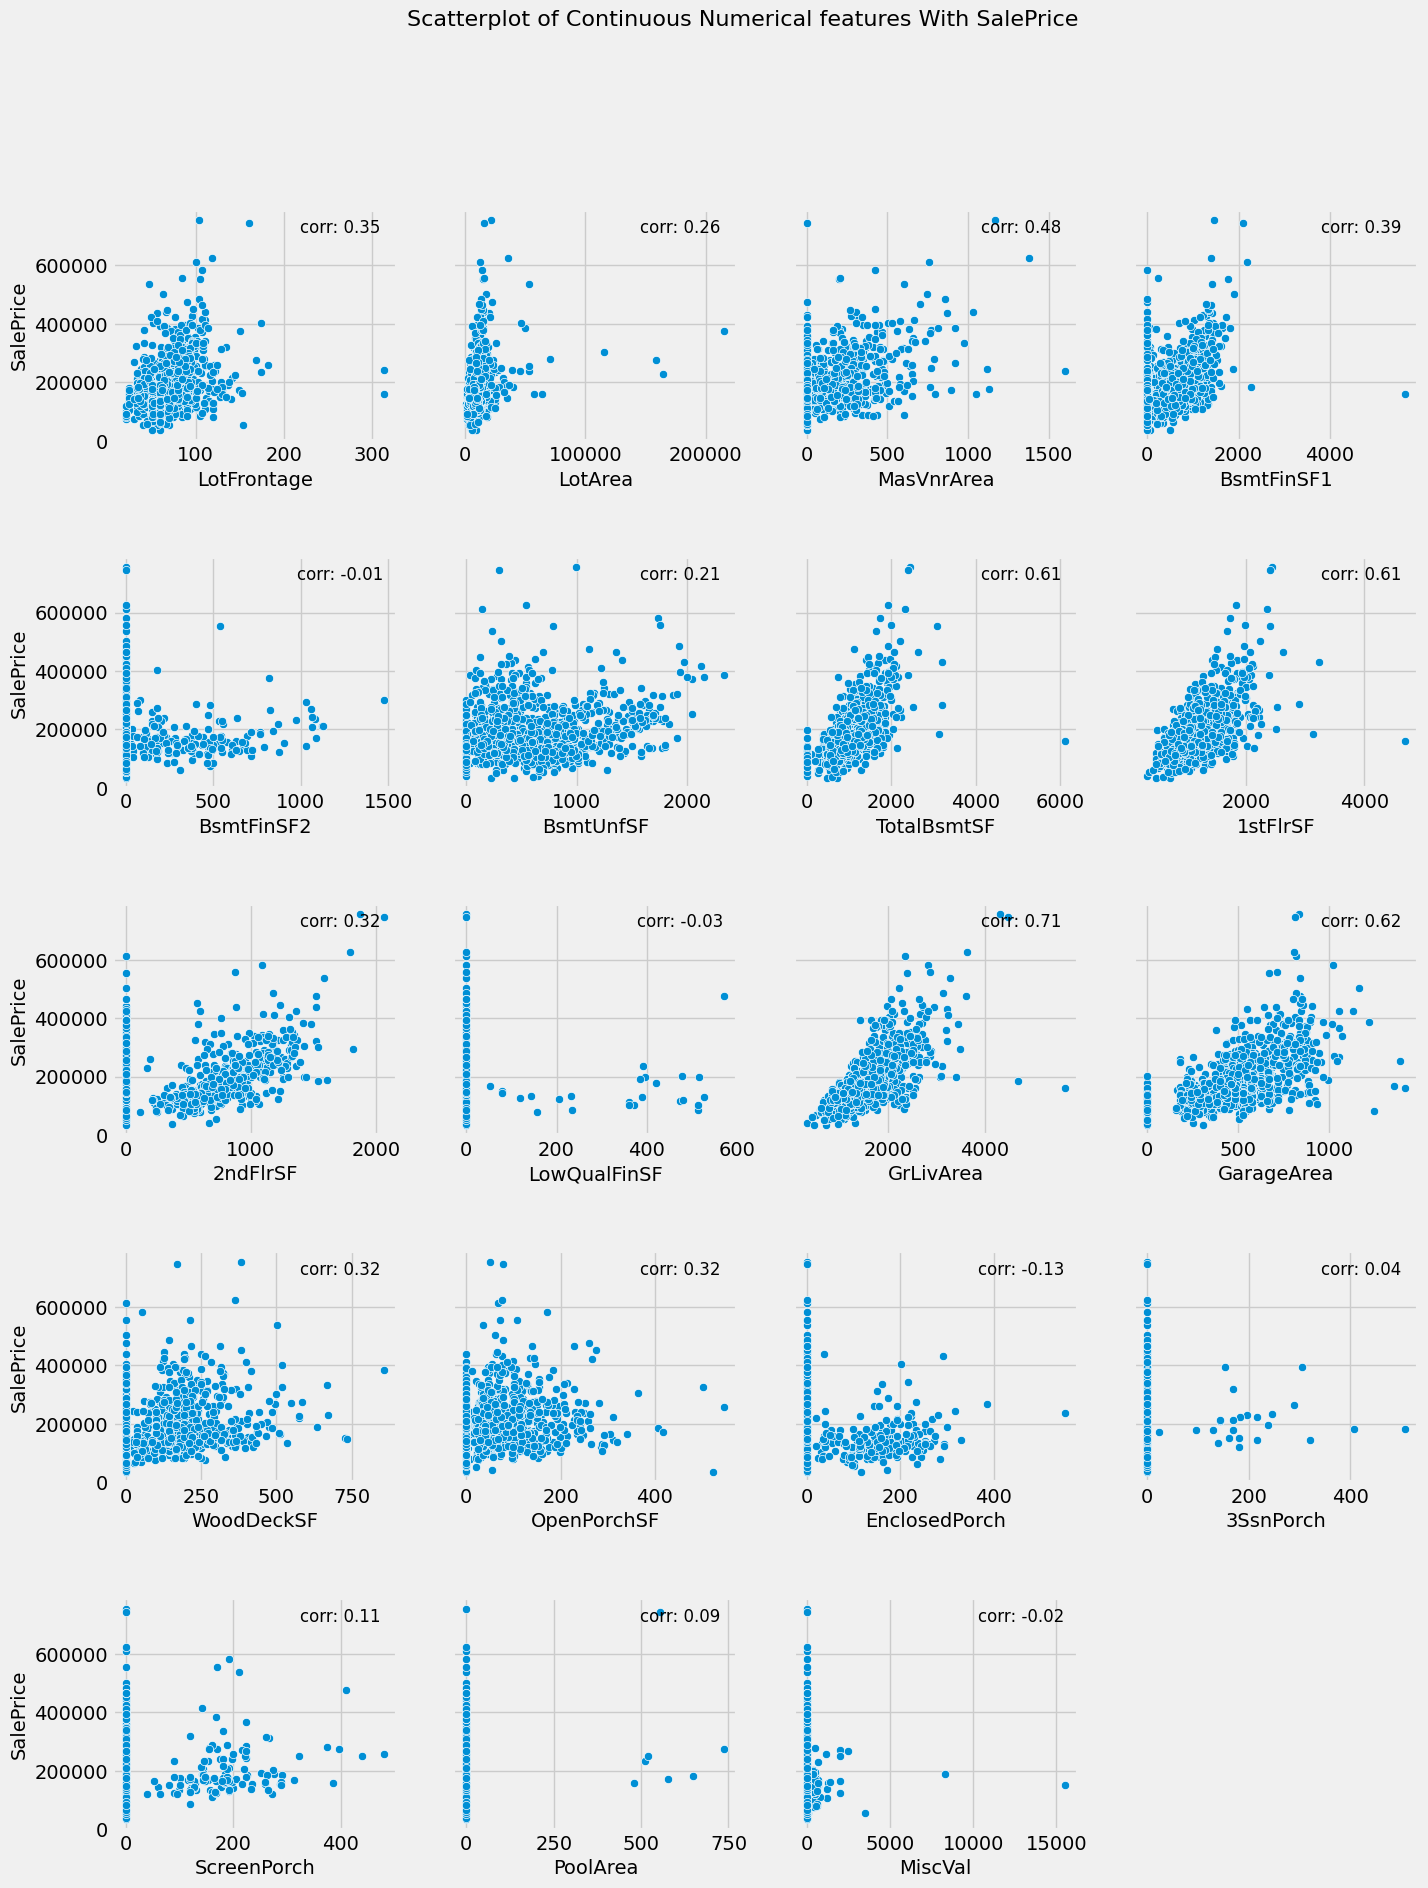

In [ ]:
visualise_data(train_data, num_con, 'scatterplot', display_corr_score=True, sharey=True)

Looking at the above scatterplots we can clearly see some outliers in our features. Couple of features such as GarageArea , LotFrontage , MasVnrArea , BsmtFinSF1 , TotalBsmtSF , 1stFlrSF , GrLivArea show some irregular values in the dataset and as such these values should be removed
1. Looking at the correlation scores in the graphs it is clear that some variables are moderately to highly correlated with SalePrice while others do not show any correlation.
2. For training a linear regression model, the variables which show little to no correlation should be dropped from both datsets because they provide no information to the model and can negatively imapct the performance.
3. TotalBsmtSF, 1stFlrSF , GrLivArea, GarageArea, show strong positive relationship with SalePrice

In [ ]:
def remove_outliers(data, col, cut_off):

    # The first condition makes sure that rows containg null values are not dropped.
    return data[(data[col].isnull()) | (data[col] < cut_off)]

In [ ]:
print(f"Train Data Shape before removing extraneous values: {train_data.shape}")

train_data = remove_outliers(train_data, 'LotFrontage', 170)
train_data = remove_outliers(train_data, 'LotArea', 100000)
train_data = remove_outliers(train_data, 'MasVnrArea', 1000)
train_data = remove_outliers(train_data, 'BsmtFinSF1', 2000)
train_data = remove_outliers(train_data, 'BsmtFinSF2', 1200)
train_data = remove_outliers(train_data, 'TotalBsmtSF', 3000)
train_data = remove_outliers(train_data, '1stFlrSF', 2600)
train_data = remove_outliers(train_data, 'GrLivArea', 4000)
train_data = remove_outliers(train_data, 'GarageArea', 1200)
train_data = remove_outliers(train_data, 'WoodDeckSF', 500)
train_data = remove_outliers(train_data, 'OpenPorchSF', 400)
train_data = remove_outliers(train_data, 'EnclosedPorch', 380)

print(f"Train Data Shape  after removing extraneous values: {train_data.shape}")

Train Data Shape before removing extraneous values: (1460, 80)
Train Data Shape  after removing extraneous values: (1410, 80)


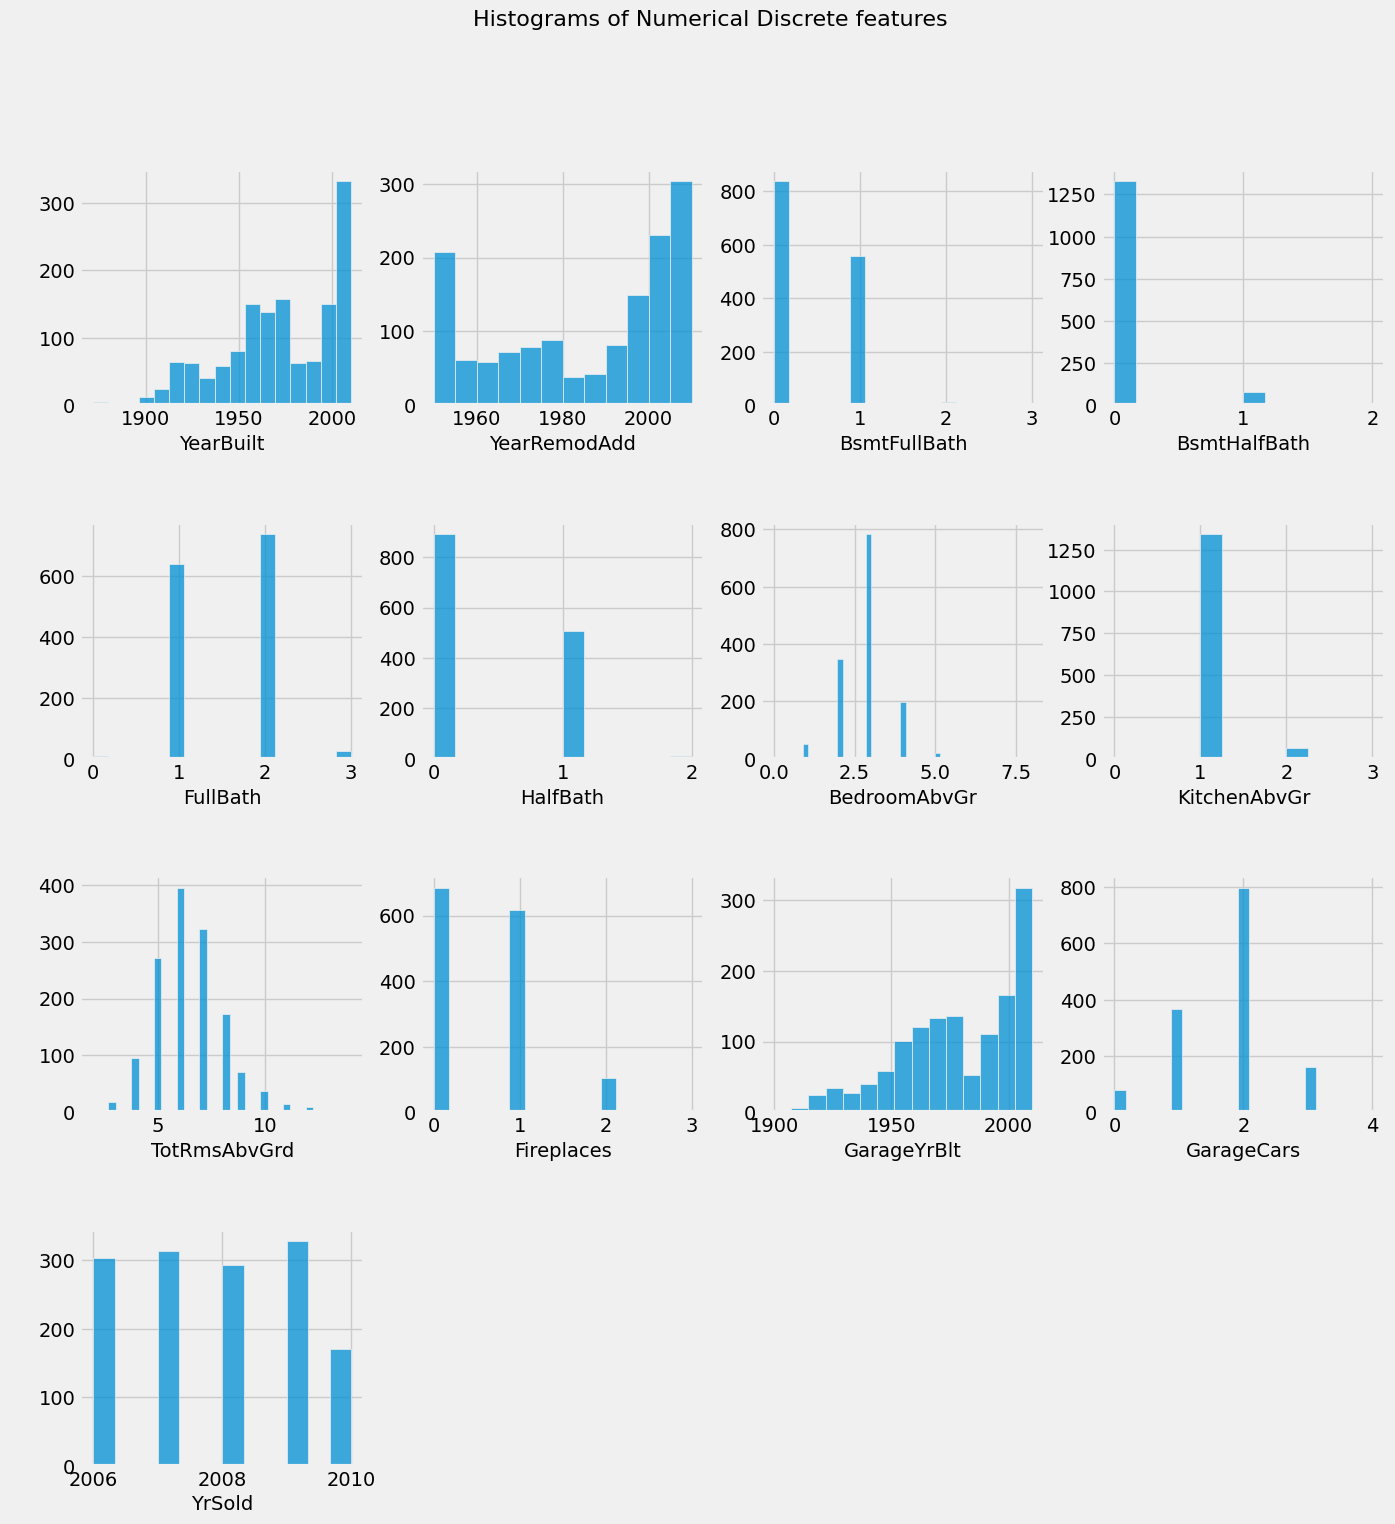

In [ ]:
visualise_data(train_data, num_dis, "histplot")

Couple of things point out by looking at these histplots.
1. All  numerical discrete variables take on a range of values from 0-12 except for MoSold, YrSold, GarageYrBlt, YearBuilt, and YearRemodAdd.
2. Large range and values of these features could potenially impact the model performance.

Rather than just looking at the distribution of numerical discrete features we can also look at their relationship with SalePrice. Couple of features which make sense such as OverallQual, YearBuilt etc can be visualized using boxplot

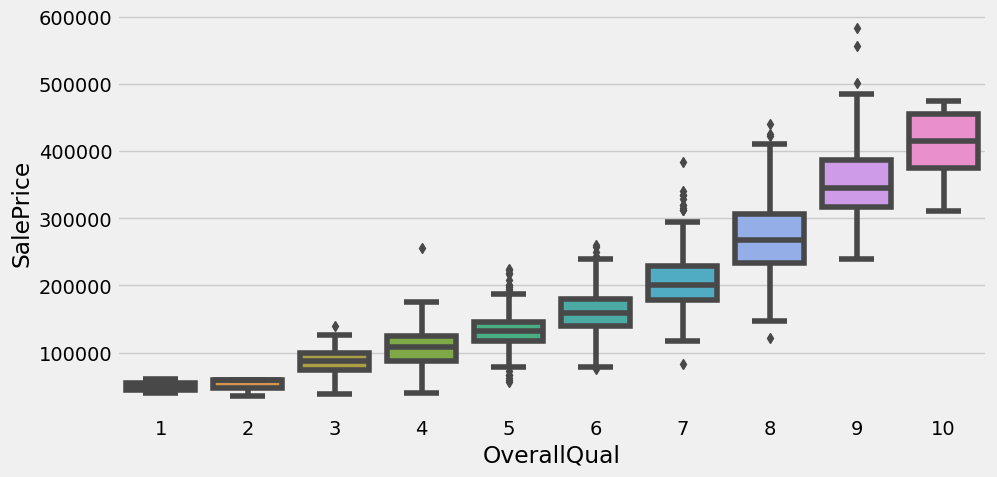

In [ ]:
# BoxPlot OverallQual/SalePrice

plt.figure(figsize=(10,5))
sns.boxplot(data=train_data, x="OverallQual", y="SalePrice")
plt.show()

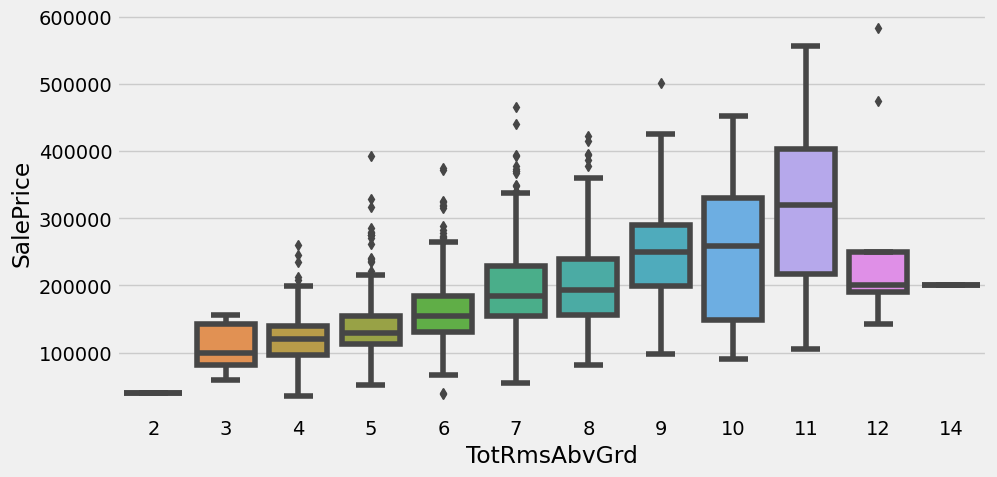

In [ ]:
# BoxPlot TotRmsAbvGrd/SalePrice

plt.figure(figsize=(10,5))
sns.boxplot(data=train_data, x="TotRmsAbvGrd", y="SalePrice")
plt.show()

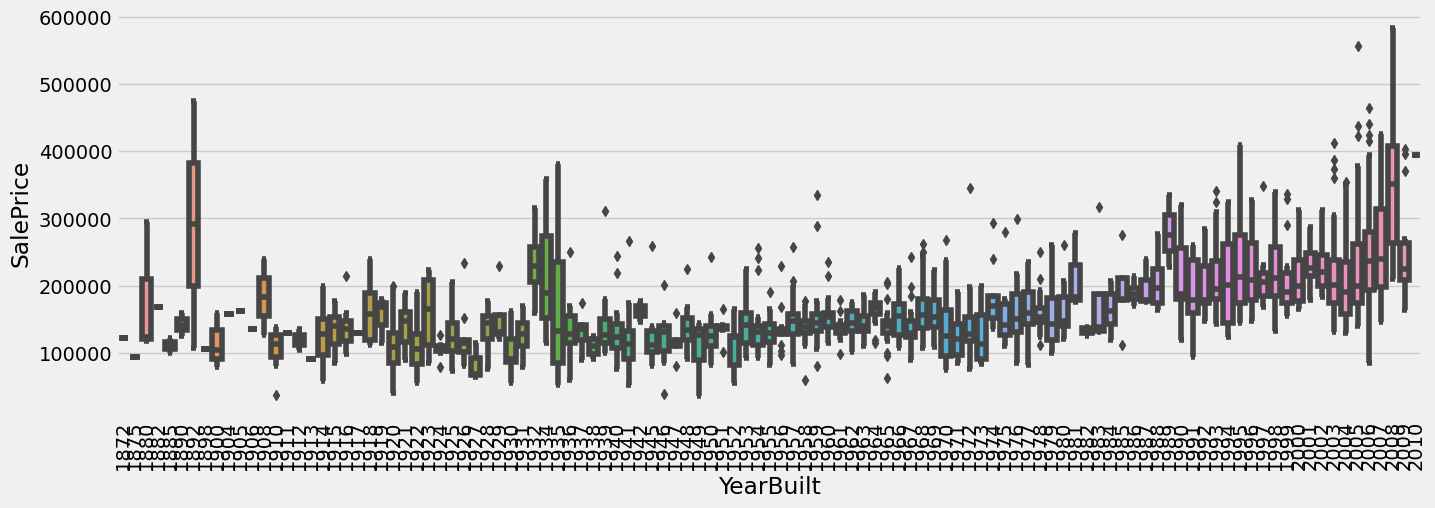

In [ ]:
# BoxPlot YearBuilt/SalePrice

plt.figure(figsize=(15,5))
sns.boxplot(data=train_data, x="YearBuilt", y="SalePrice")
plt.xticks(rotation=90)
plt.show()

- As expected, the SalePrice increases as the OverallQual of the house increases as well
- SalePrice increases as Total rooms incerease but strangely enough as the rooms go upto 12 SalePrice decreases
- It seems that SalePrice is not affected by how long ago the house was built. But we can generally assume that newer homes will have higher SalePrice.

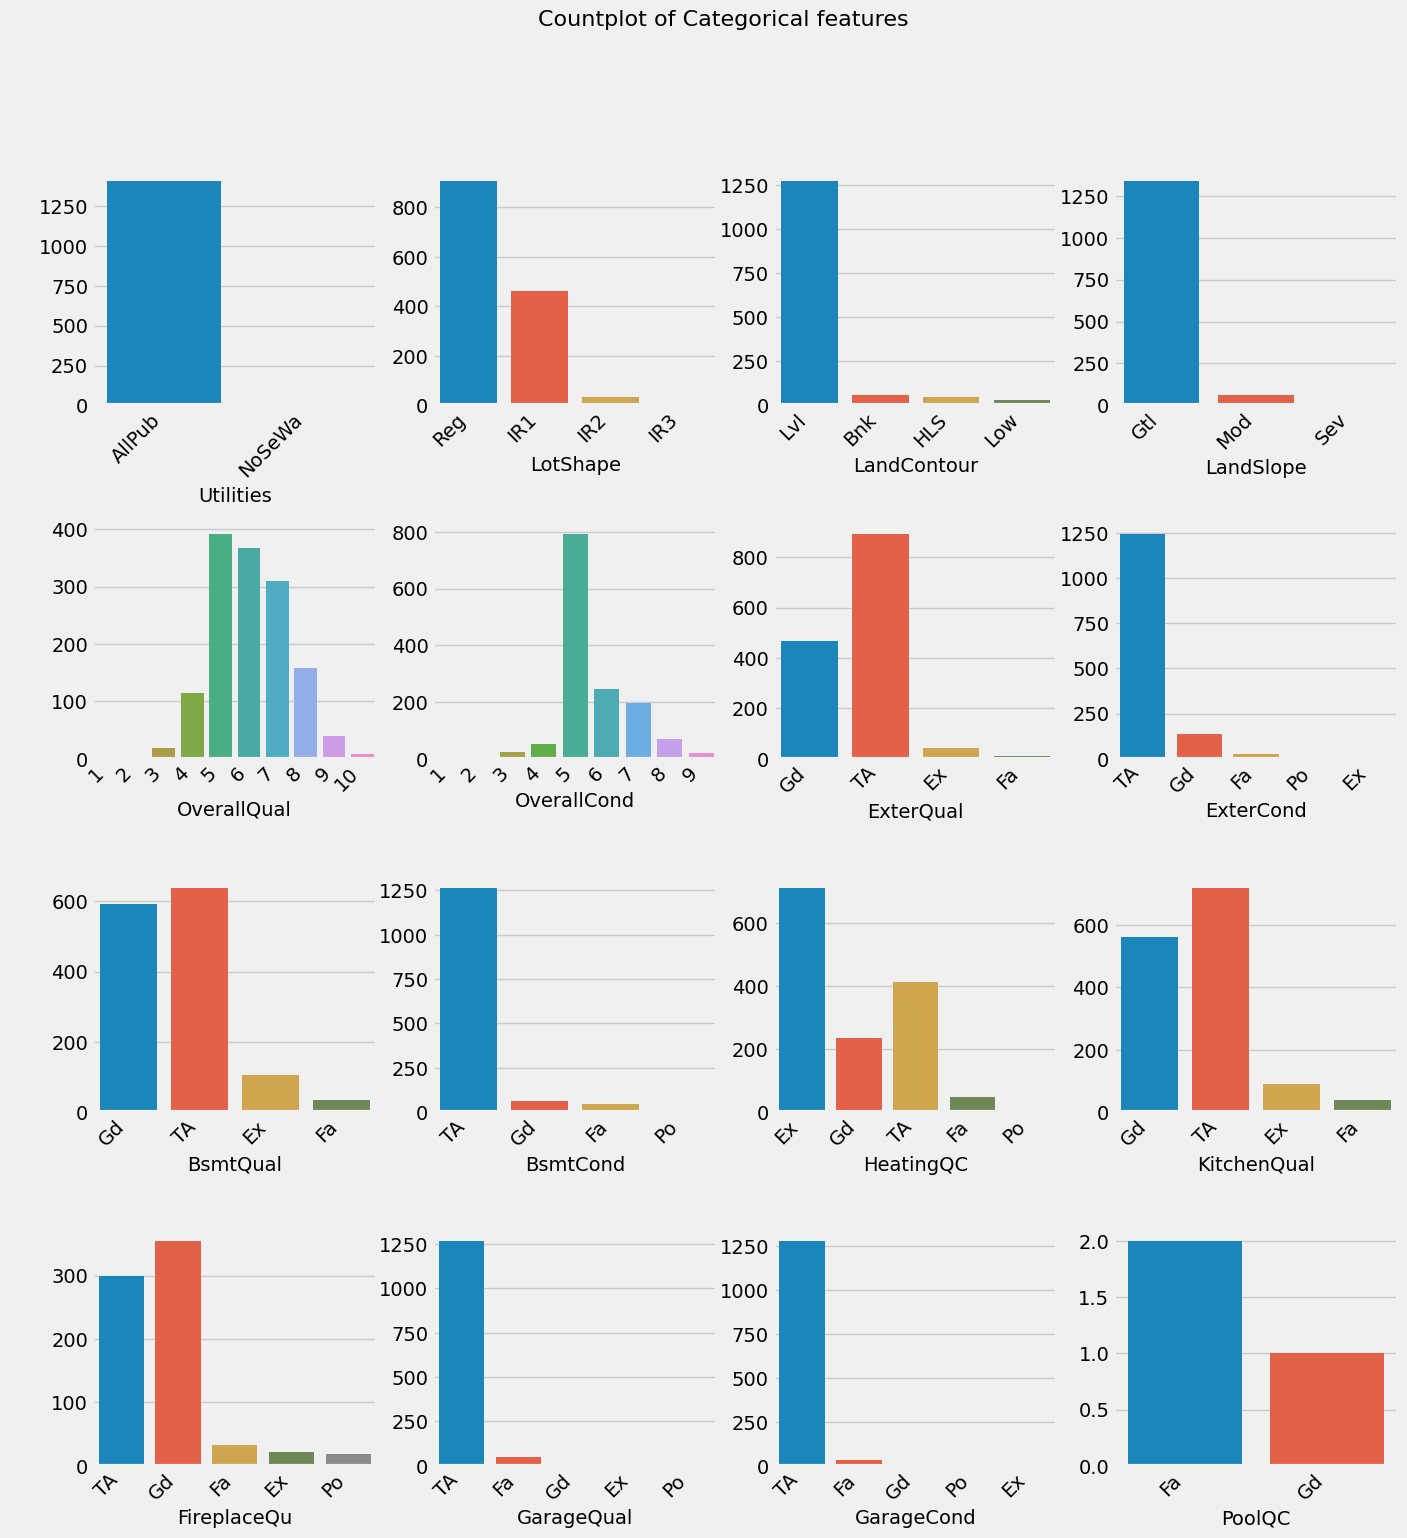

In [ ]:
visualise_data(train_data, cat_ord, "countplot")

1. There are many features with only a single dominant value. For example "Utilities" feature takes on a single value of AllPub for almost all cases (more than 1400).
2. Features such as FireplaceQu, GarageQual, and GarageCond can all be encoded as ordinal values.

In [ ]:
# Define mapping for categorical ordinal features in train_data

cat_ord_map1 = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
cat_ord_map2 = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
cat_ord_map3 = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}
cat_ord_map4 = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
cat_ord_map5 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
cat_ord_map6 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
cat_ord_map7 = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10}
cat_ord_map8 = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
cat_ord_map9 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}

Now lets visualise the categorical nominal variables in the dataset

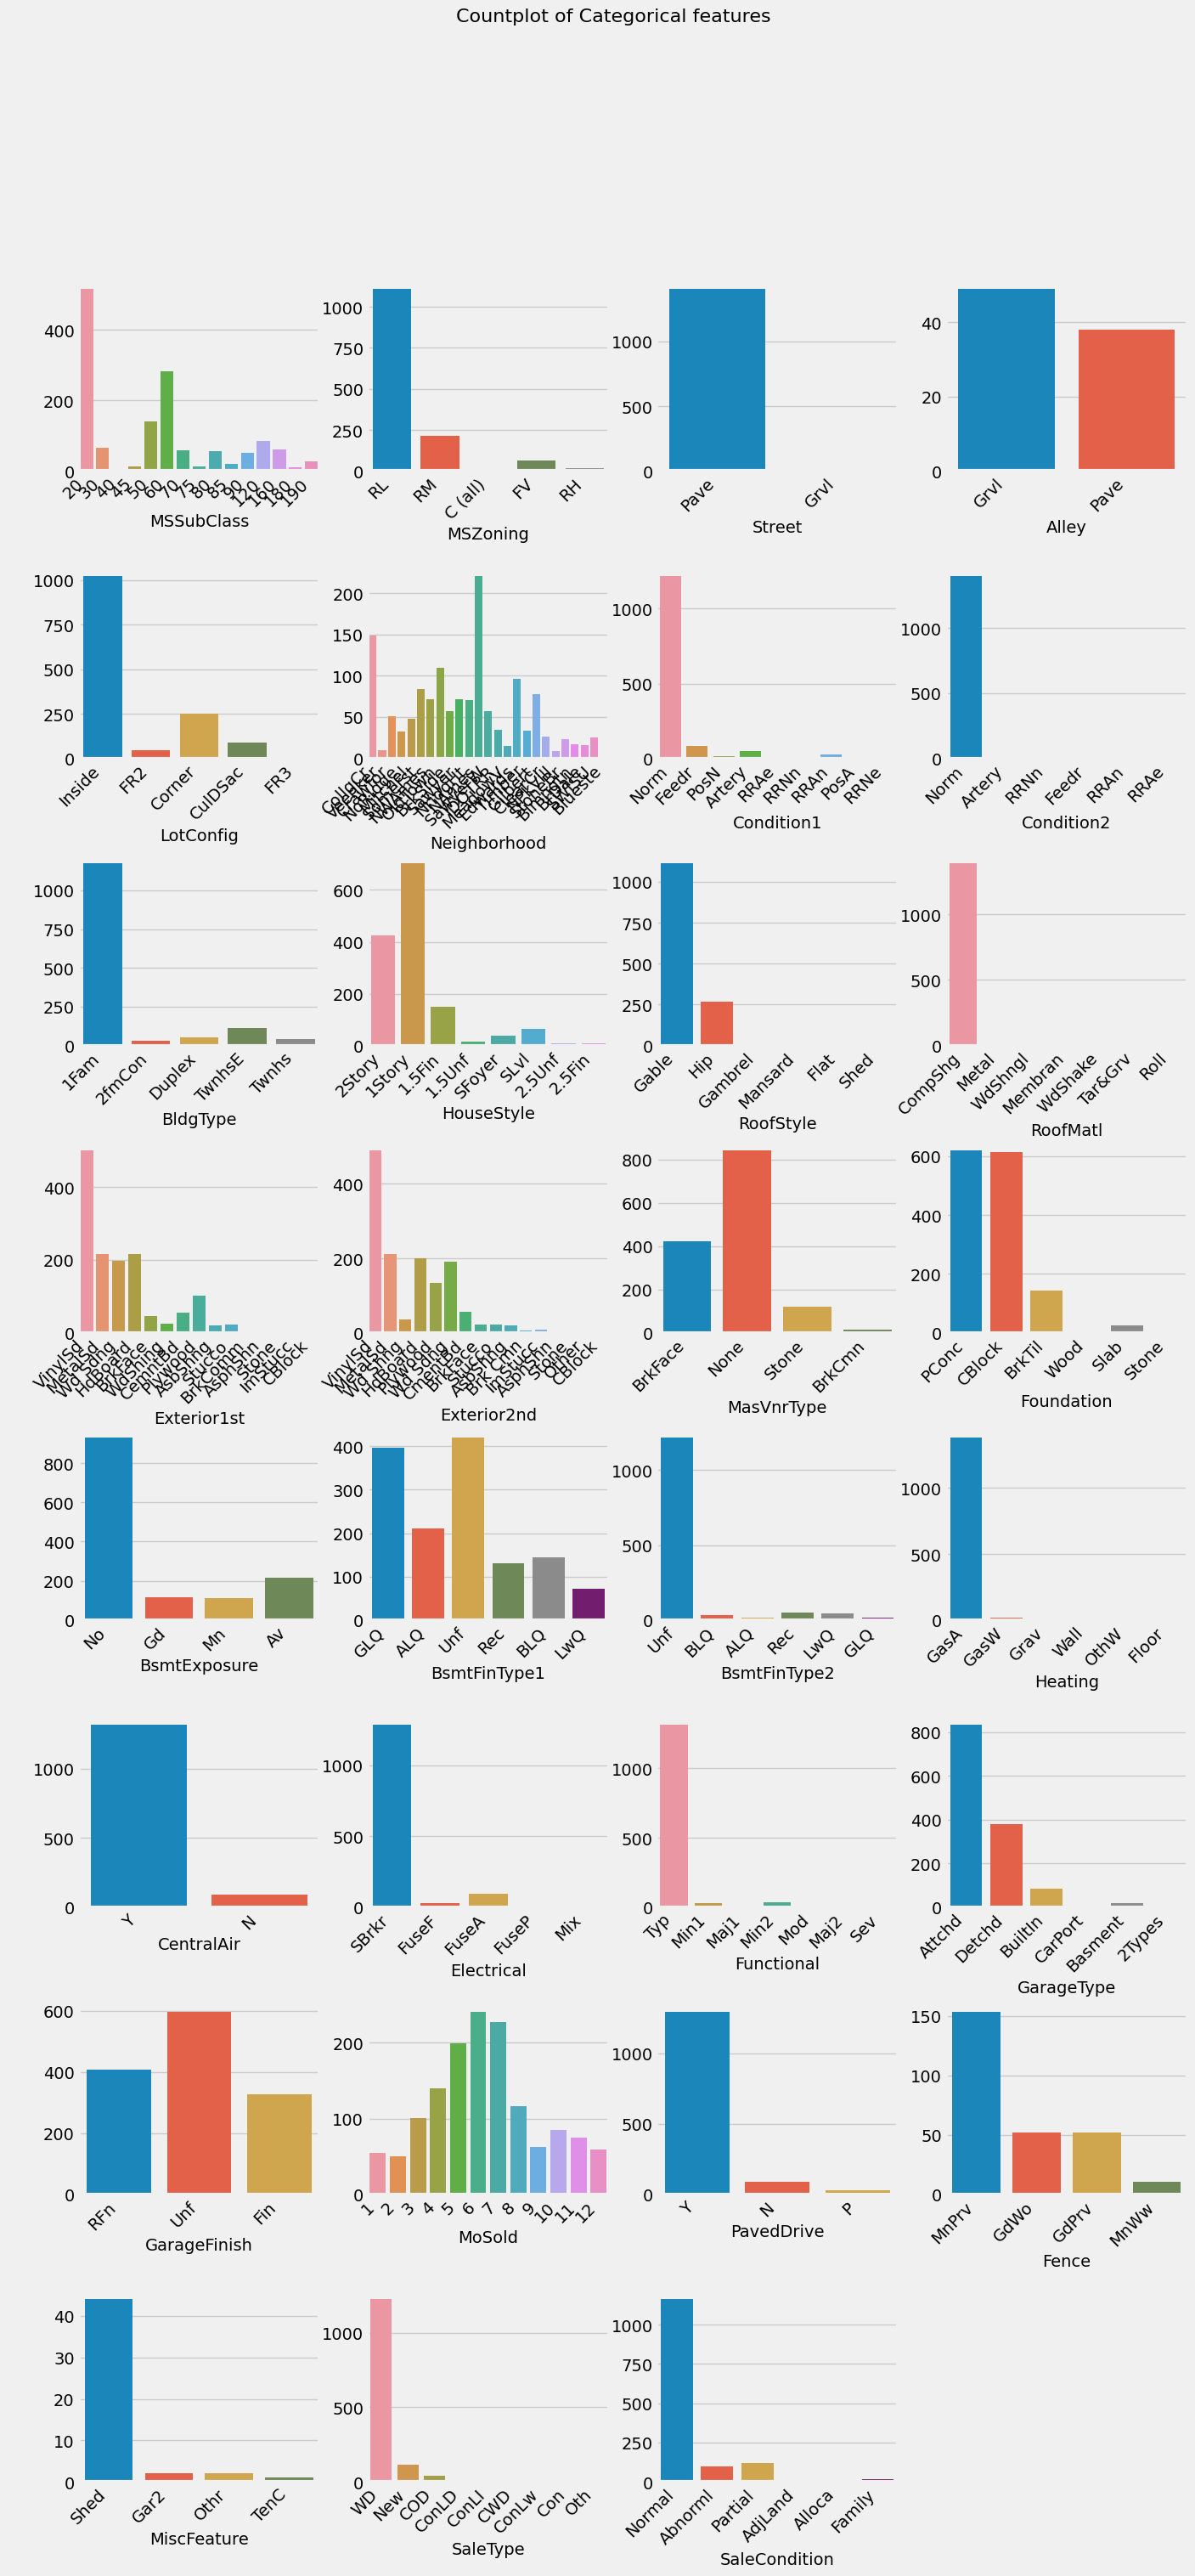

In [ ]:
visualise_data(train_data, cat_nom, "countplot")

The categrical nominal features also follow the same pattern as ordinal features
1. There are many features with a single dominant value. For example variable 'Street' takes only a single value of 'Pave' for almost all cases (more than 1100)
2. Variable 'Alley' has a lot of missing values becasue as seen total count of values for all cases is less than 100.

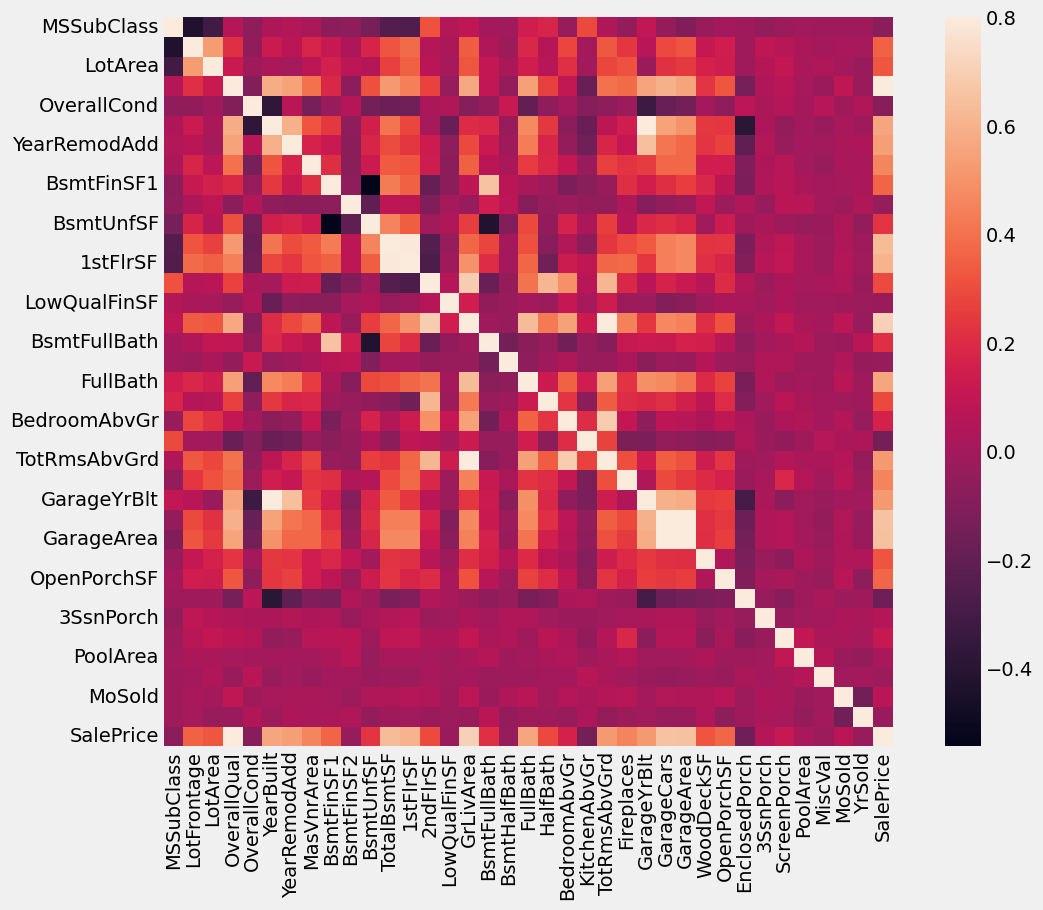

In [ ]:
corrmat = train_data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

plt.show()

### 2. Data Preparation

**Change dtypes of columns which might have been misinterpreted by pandas.**

Cols OverallQual, OverallCond are categorical ordinal while MSSubClass, MoSold are categorical nominal.

In [ ]:
train_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']] = train_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].astype('str')
test_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']] = test_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].astype('str')

print(f"In train Data:\n\n{train_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].dtypes}")

print(f"\n\nIn test Data:\n\n{test_data[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']].dtypes}")

In train Data:

MSSubClass     object
OverallQual    object
OverallCond    object
MoSold         object
dtype: object


In test Data:

MSSubClass     object
OverallQual    object
OverallCond    object
MoSold         object
dtype: object


In [ ]:
# dislplay column headers for displaying statistics about the data.
print(f"{'Column':<15} {'Unique Values':<16} {'Variance':<15} {'Proportion':<16}")

# print a horizontal line
print('_' * (shutil.get_terminal_size().columns), '\n')

for column in numeric_columns:
    unique_values = train_data[column].nunique()
    total_values = train_data.shape[0]

    proportion = (unique_values / total_values) * 100
    variance = np.var(train_data[column], ddof=1) # ddof is the degress of freedom, when set to 1 will divide by n-1 values

    print(f"{column:<15} {unique_values:<16} {variance:<15.2f} {proportion:<12.2f}")

Column          Unique Values    Variance        Proportion      
________________________________________________________________________________ 

LotFrontage     105              444.18          7.45        
LotArea         1031             24964307.96     73.12       
MasVnrArea      307              24649.49        21.77       
BsmtFinSF1      610              174693.00       43.26       
BsmtFinSF2      137              23772.05        9.72        
BsmtUnfSF       764              192071.37       54.18       
TotalBsmtSF     696              154480.75       49.36       
1stFlrSF        723              124530.33       51.28       
2ndFlrSF        400              179210.64       28.37       
LowQualFinSF    23               2341.08         1.63        
GrLivArea       824              226193.00       58.44       
GarageArea      423              42763.41        30.00       
WoodDeckSF      253              12538.45        17.94       
OpenPorchSF     191              3700.83     

In [ ]:
single_value_columns = [col for col in train_data.columns if train_data[col].nunique() == 1]
train_data.drop(single_value_columns, axis=1, inplace=True)

print(f"Single value columns: {single_value_columns}")
print("Dropped columns:", single_value_columns)

Single value columns: []
Dropped columns: []


In [ ]:
#counts the number of True(duplicate) values
print('Total number of duplicated rows in train_data:', train_data.duplicated().sum())

Total number of duplicated rows in train_data: 0


In [ ]:
print('Total number of duplicated rows in test_data:',test_data.duplicated().sum())

Total number of duplicated rows in test_data: 0


Show the columns which have a dominant single value with more than 1300 value_counts.

In [ ]:
# Print column headers for displaying statistics about the data.
print(f"{'Column':<15} {'Dominant Value':<16} {'Value Count(> 1300)':<15}")

# Print a horizontal line to separate the header from the data.
print('_' * (shutil.get_terminal_size().columns), '\n')

for column in train_data.columns:

    # Calculate the value counts for the current column.
    value_count = train_data[column].value_counts()

    # Iterate over each case (value) and its count in the value counts.
    for case, count in value_count.to_dict().items():
        if count > 1300:
            # Print the column name, dominant case, and its count.
            print(f"{column:<15} {case:<16} {count:<15}")
            break

Column          Dominant Value   Value Count(> 1300)
________________________________________________________________________________ 

Street          Pave             1406           
Utilities       AllPub           1409           
LandSlope       Gtl              1339           
Condition2      Norm             1399           
RoofMatl        CompShg          1391           
Heating         GasA             1381           
CentralAir      Y                1318           
LowQualFinSF    0                1385           
BsmtHalfBath    0                1331           
KitchenAbvGr    1                1342           
Functional      Typ              1313           
3SsnPorch       0                1386           
PoolArea        0                1407           
MiscVal         0                1363           


To be able to drop the columns which are dominated by a single value we can draw a line plot to see how many columns would be dropped at a praticular threshold.

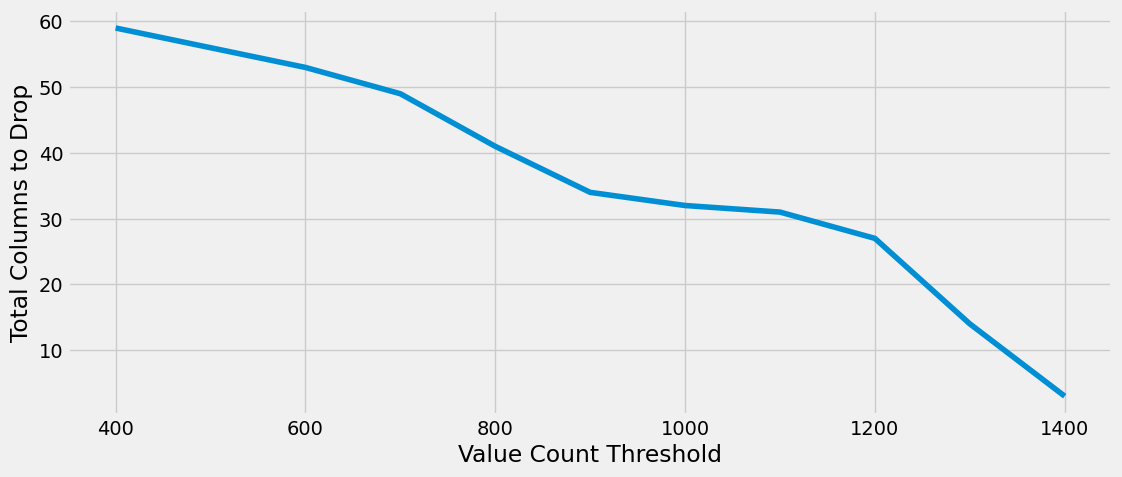

In [ ]:
num_cols_to_drop = list() # list of total number of columns to drop at a particular threshold
threshold = list(range(400, 1500, 100)) # threshold ranges

for t in threshold:
    total_cols = 0 # initialize to 0

    for column in train_data.columns:
        value_count = train_data[column].value_counts()
        for case, count in value_count.to_dict().items():
            if count > t:
                total_cols += 1
                break
    num_cols_to_drop.append(total_cols)

plt.figure(figsize=(12,5))
plt.plot(threshold, num_cols_to_drop)

plt.xlabel("Value Count Threshold")
plt.ylabel("Total Columns to Drop")
plt.show()

The lineplot shows that there are almost 50 features in training dataset which have a single value with more than 700 cases. The line tends to flatten as the threshold approaches to 900 to 1200 values. This could be a good point to set the threshold and any features which contain a value_count above this threshold will be dropped from both datasets.

In [ ]:
cols_to_drop = list()

for column in train_data.columns:
    value_count = train_data[column].value_counts()
    for case, count in value_count.to_dict().items():
        if count > 1200: # Set threshold to 1200
            cols_to_drop.append(column)
            break

print("Columns to be dropped because they contain a single value for most of the observations:\n")
print(cols_to_drop)
print(f"\nTotal columns to be dropped: {len(cols_to_drop)}")

Columns to be dropped because they contain a single value for most of the observations:

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']

Total columns to be dropped: 27


In [ ]:
# drop columns in train dataset

train_data.drop(cols_to_drop, axis=1, inplace=True)
print(f"Train data shape after dropping columns with single dominant value: {train_data.shape}")

Train data shape after dropping columns with single dominant value: (1410, 53)


In [ ]:
# drop columns in test dataset

test_data.drop(cols_to_drop, axis=1, inplace=True)
print(f"Test data shape after dropping columns with single dominant value: {test_data.shape}")

Test data shape after dropping columns with single dominant value: (1459, 52)


In [ ]:
# Remove dropped columns from the num_con, num_ord, cat_nom, cat_ord, numeric_columns, and
# categorical_columns as they are not part of further analysis

for col in cols_to_drop:
    if col in cat_nom:
        cat_nom.remove(col)
        categorical_columns.remove(col)
    elif col in cat_ord:
        cat_ord.remove(col)
        categorical_columns.remove(col)
    elif col in num_dis:
        num_dis.remove(col)
        numeric_columns.remove(col)
    elif col in num_con:
        num_con.remove(col)
        numeric_columns.remove(col)

##### Handling Missing Values


In [ ]:
# total number of null values in train_data
total = train_data.isnull().sum().sort_values(ascending=False)

# percentage of total null_values in train_data
percent = ((train_data.isnull().sum() / train_data.shape[0]) * 100).sort_values(ascending=False)

# create DataFrame of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

# drop columns which had 0 missing values from the DataFrame
no_missing_cols = missing_data[missing_data['Total Missing'] == 0].index
missing_data.drop(no_missing_cols, inplace=True)
missing_data.index.name = 'Training Feature'

display(missing_data.style.set_caption("<b>Missing values in train_data</b>"))

,Total Missing,Percent
Training Feature,,
PoolQC,1407,99.787234
MiscFeature,1361,96.524823
Alley,1323,93.829787
Fence,1142,80.992908
FireplaceQu,685,48.581560
LotFrontage,246,17.446809
GarageType,80,5.673759
GarageFinish,80,5.673759
GarageYrBlt,80,5.673759


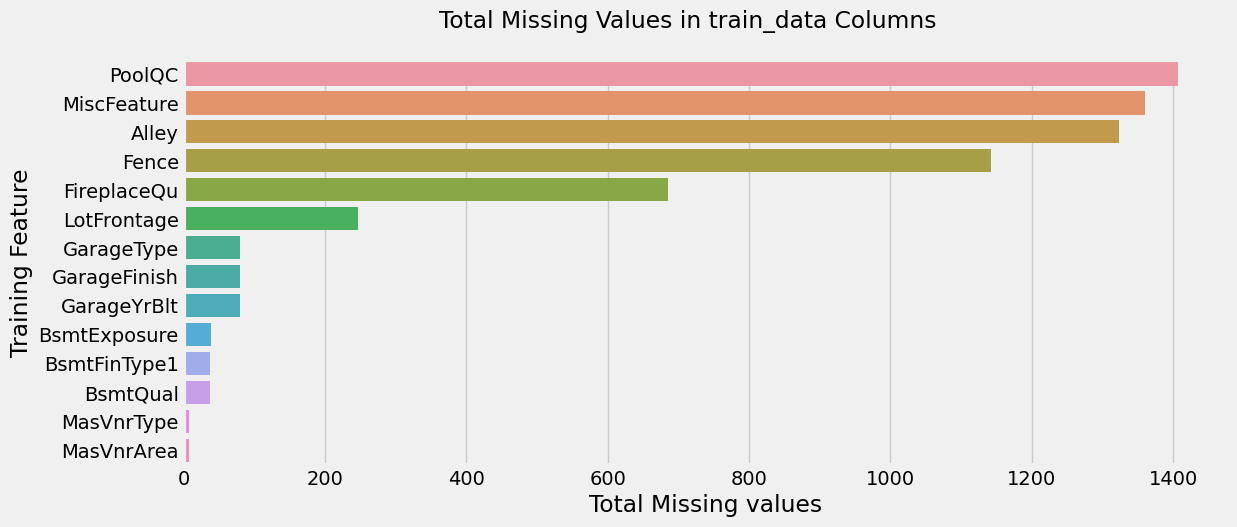

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=missing_data['Total Missing'], y=missing_data.index)

plt.xlabel("Total Missing values")
plt.ylabel("Training Feature")
plt.suptitle("Total Missing Values in train_data Columns")
plt.show()

As seen in the output there are 6 features in the dataset which contain a significant number of null values. These features should be dropped from both training and test_datasets

In [ ]:
# drop all columns from train_data and test_data which had more than 45% missing values
cols_to_drop = list(missing_data[missing_data['Percent'] > 15].index)

print(f"Columns to be dropped due to significant number of missing values:\n{cols_to_drop}")

print(f"\nTotal columns to be dropped: {len(cols_to_drop)}")

Columns to be dropped due to significant number of missing values:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

Total columns to be dropped: 6


In [ ]:
# drop columns in train data
train_data = train_data.drop(cols_to_drop, axis=1)

print(f"Train data shape after dropping columns with significant missing values: {train_data.shape}")

Train data shape after dropping columns with significant missing values: (1410, 47)


In [ ]:
# drop columns from test_data
test_data = test_data.drop(cols_to_drop, axis=1)

print(f"Test data shape after dropping columns with significant missing values: {test_data.shape}")

Test data shape after dropping columns with significant missing values: (1459, 46)


In [ ]:
# Remove dropped columns from the num_con, num_ord, cat_nom, cat_ord, numeric_columns, and
# categorical_columns as they are not part of further analysis

for col in cols_to_drop:
    if col in cat_nom:
        cat_nom.remove(col)
        categorical_columns.remove(col)
    elif col in cat_ord:
        cat_ord.remove(col)
        categorical_columns.remove(col)
    elif col in num_dis:
        num_dis.remove(col)
        numeric_columns.remove(col)
    elif col in num_con:
        num_con.remove(col)
        numeric_columns.remove(col)

# drop the cols from missing_data as well
missing_data.drop(cols_to_drop, inplace=True)

In [ ]:
display(missing_data.style.set_caption("<b>Missing values in train_data</b>"))

,Total Missing,Percent
Training Feature,,
GarageType,80,5.673759
GarageFinish,80,5.673759
GarageYrBlt,80,5.673759
BsmtExposure,38,2.695035
BsmtFinType1,37,2.624113
BsmtQual,37,2.624113
MasVnrType,8,0.567376
MasVnrArea,8,0.567376


In [ ]:
# Fill missing values

missing_data_cols = list(missing_data.index)

# fill numeric columns with mean and categorical_columns with mode
for col in missing_data_cols:
  if col in numeric_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mean())
  elif col in categorical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [ ]:
# check to see if all missing values have been filled

print(f"Total null values in train_data after imputing them: ", end="")
print(train_data.isnull().any(axis=1).sum())

Total null values in train_data after imputing them: 0


No we will handle missing values in test_data

In [ ]:
# total number of null values in test_data
total = test_data.isnull().sum().sort_values(ascending=False)

# percentage of total null_values in test_data
percent = ((test_data.isnull().sum() / test_data.shape[0]) * 100).sort_values(ascending=False)

# create DataFrame of missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

# drop columns which had 0 missing values from the DataFrame
no_missing_cols = missing_data[missing_data['Total Missing'] == 0].index
missing_data.drop(no_missing_cols, inplace=True)
missing_data.index.name = 'Feature'

display(missing_data.style.set_caption("<b>Missing values in test_data</b>"))

,Total Missing,Percent
Feature,,
GarageFinish,78,5.346127
GarageYrBlt,78,5.346127
GarageType,76,5.209047
BsmtExposure,44,3.015764
BsmtQual,44,3.015764
BsmtFinType1,42,2.878684
MasVnrType,16,1.096642
MasVnrArea,15,1.028101
MSZoning,4,0.274160


test_data has more features which are missing values than there were in train_data. We will use the same strategy for imputing values in test_data as we used for train_data.

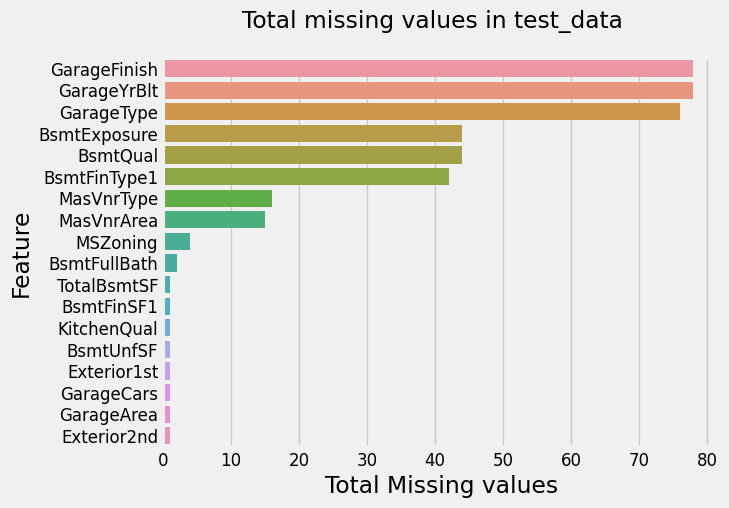

In [ ]:
# barplot to visulaise the missing values in test_data
sns.barplot(x=missing_data['Total Missing'], y=missing_data.index)

plt.xlabel("Total Missing values")
plt.ylabel("Feature")
plt.suptitle("Total missing values in test_data")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# fill missing values in test_data

missing_data_cols = list(missing_data.index)

# fill numeric_columns with mean and categorical_columns with mode
for col in missing_data_cols:
  if col in numeric_columns:
    test_data[col] = test_data[col].fillna(test_data[col].mean())
  elif col in categorical_columns:
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

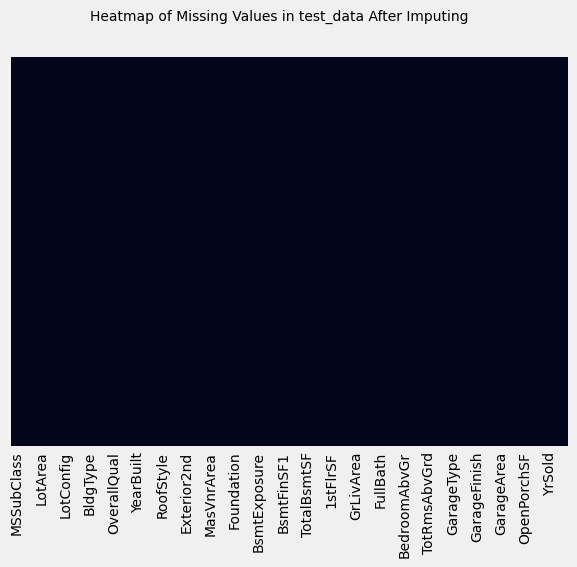

In [ ]:
# heatmap to confirm all missing values have been filled in test_data
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

plt.xticks(fontsize=10)
plt.ylabel("")
plt.suptitle("Heatmap of Missing Values in test_data After Imputing", fontsize=10)
plt.show()

In [ ]:
# check to see if all missing values have been filled

print(f"Total null values in test_data after imputing them: ", end="")
print(test_data.isnull().any(axis=1).sum())

Total null values in test_data after imputing them: 0


In [ ]:
print(cat_nom)
print(cat_ord)
print(num_dis)
print(num_con)

['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish', 'MoSold', 'SaleCondition']
['LotShape', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual']
['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'YrSold']
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


**Removing the skew in variables and log transform the target variable**

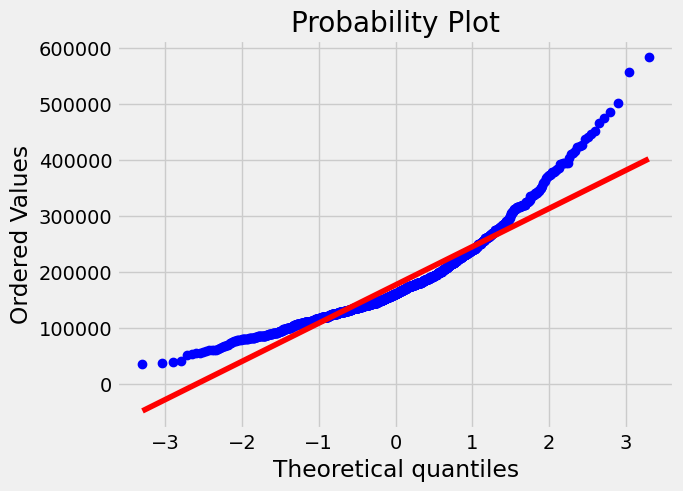

In [ ]:
# Assess the normality of SalePrice
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

Looking at the Q-Q plot, it is clear that SalePrice does not follow a normal distribution

In [ ]:
#log transform the target:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

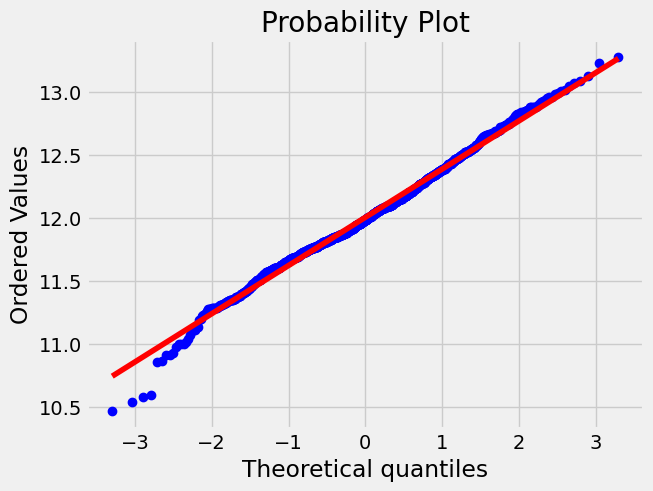

In [ ]:
# qq-plot for assessing normality after log transform
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

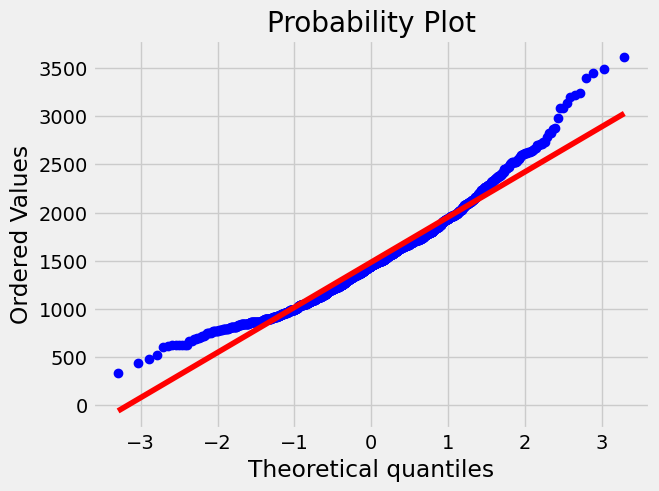

In [ ]:
stats.probplot(train_data['GrLivArea'], plot=plt);
plt.show()

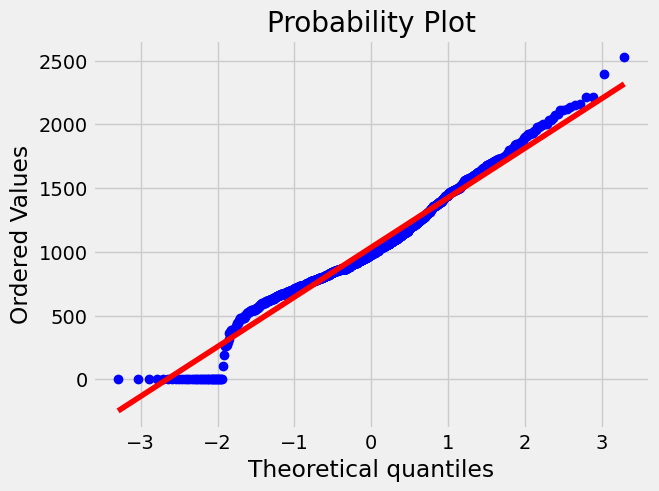

In [ ]:
stats.probplot(train_data['TotalBsmtSF'], plot=plt)
plt.show()

In [ ]:
train_data["GrLivArea"] = np.log1p(train_data["GrLivArea"])
train_data["TotalBsmtSF"] = np.log1p(train_data["TotalBsmtSF"])

test_data["GrLivArea"] = np.log1p(test_data["GrLivArea"])
test_data["TotalBsmtSF"] = np.log1p(test_data["TotalBsmtSF"])

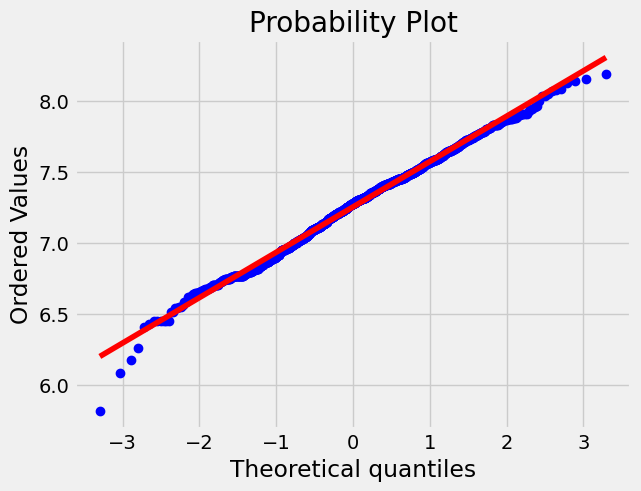

In [ ]:
# qq-plot for assessing normality after log transform
stats.probplot(train_data['GrLivArea'], plot=plt);
plt.show()

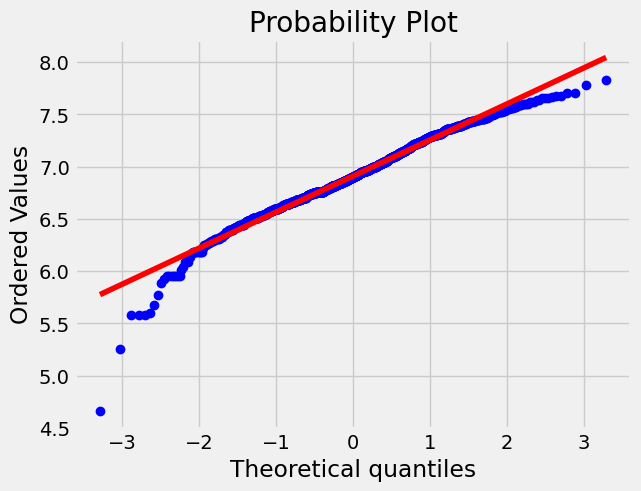

In [ ]:
# qq-plot for assessing normality after log transform
stats.probplot(train_data[train_data['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt);
plt.show()

In [ ]:
from scipy.stats import skew
#compute skewness in numerical column
skewed_features = train_data[numeric_columns].apply(lambda x: skew(x))

In [ ]:
skewed_features = skewed_features[skewed_features > 0.5]
skewed_features = skewed_features.index
skewed_features

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

In [ ]:
# Take log of skewed features

train_data[skewed_features] = np.log1p(train_data[skewed_features])
test_data[skewed_features] = np.log1p(test_data[skewed_features])

##### Encoding Variables


First, categorical nominal variables are enoded

In [ ]:
combined_data = pd.concat([train_data, test_data], axis=0)
print(f"Combined data shape: {combined_data.shape}")

Combined data shape: (2869, 47)


In [ ]:
## create dummy variables only for categorical nominal columns
dummy_data = pd.get_dummies(combined_data[cat_nom], drop_first=True)
print(dummy_data.shape)


(2869, 131)


In [ ]:
# Combine dummy_data and combined_data together
combined_data = pd.concat([combined_data, dummy_data], axis=1)
print(combined_data.shape)

(2869, 178)


In [ ]:
# Before splitting combined_data we need to drop those columns whose values have now been encoded
combined_data.drop(cat_nom, axis=1, inplace=True)
print(combined_data.shape)

(2869, 161)


In [ ]:
# Split combined_data back into train_data and test_data
# We will take advantage of the index ('Id' column) from both datasets and use the loc operator to index into combined_data.

train_data = combined_data.loc[train_data.index, :]
test_data = combined_data.loc[test_data.index, :]

# drop SalePrice column from test_data
test_data.drop('SalePrice', axis=1, inplace=True)

# Summarize the shape of datasets
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (1410, 161)
Test data shape: (1459, 160)


Now to encode categorical ordinal variables. Because mapping has already been defined for these features, we can use that mapping to encode values in ordinal features.

In [ ]:
custom_mappings = [cat_ord_map1, cat_ord_map2, cat_ord_map3, cat_ord_map4, cat_ord_map5, cat_ord_map6,
                   cat_ord_map7, cat_ord_map8, cat_ord_map9]
for col in cat_ord:
    for mapping in custom_mappings:
        if set(train_data[col].unique()) == set(mapping):
            train_data[col] = train_data[col].map(mapping)
            test_data[col] = test_data[col].map(mapping)
            break

In [ ]:
pd.set_option('display.max.columns', None)
display(train_data[num_con + ['SalePrice']].describe().loc[['min', 'max', 'std', 'mean']])

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
min,7.170888,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,5.814131,0.000000,0.000000,0.000000,10.471978
max,11.167077,6.883463,7.552237,7.756623,7.833996,7.833996,7.506042,8.191186,1166.000000,6.206576,5.899897,13.275829
std,0.481856,2.595647,2.987525,1.864296,1.157342,0.306530,3.282179,0.320376,206.793155,2.571871,2.144843,0.383041
mean,9.086454,2.096194,4.184803,5.641720,6.729824,6.994501,2.837368,7.253395,465.002128,2.405373,2.263852,12.007609


In [ ]:
# check to see if all object dtype columns have been handled
print(set(train_data.dtypes))
print(set(test_data.dtypes))

{dtype('float64'), dtype('uint8'), dtype('int64')}
{dtype('float64'), dtype('uint8'), dtype('int64')}


**Splitting Data**

Once we have cleaned the datasets, we can now split them into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
print(f"Train {X_train.shape}, {y_train.shape}")
print(f"Test  {X_test.shape},  {y_test.shape}")

Train (1128, 160), (1128,)
Test  (282, 160),  (282,)


# **Data Transform**


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def apply_transform(X_train, X_test, cols_to_transform, scaler_type='standard'):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose from 'standard', 'minmax', or 'robust'")

    scaler.fit(X_train[cols_to_transform])

    train_values_tran = scaler.transform(X_train[cols_to_transform])
    test_values_tran = scaler.transform(X_test[cols_to_transform])

    X_train_tran = X_train.copy()
    X_test_tran = X_test.copy()

    X_train_tran[cols_to_transform] = train_values_tran
    X_test_tran[cols_to_transform] = test_values_tran

    return X_train_tran, X_test_tran

### **Feature** **Selection**



In [ ]:
X_train_transformed, X_test_transformed = apply_transform(X_train, X_test, numeric_columns, "robust")

Feature 0   178.30
Feature 1   77.63
Feature 2   2185.71
Feature 3   1.09
Feature 4   729.45
Feature 5   590.44
Feature 6   243.48
Feature 7   918.41
Feature 8   883.70
Feature 9   54.30

...



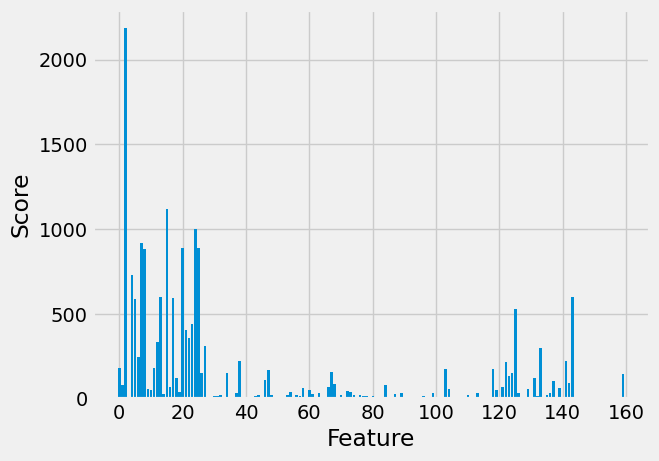

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=150)
fs.fit(X_train_transformed, y_train)

X_train_transformed_fs = fs.transform(X_train_transformed)
X_test_transformed_fs = fs.transform(X_test_transformed)

for i in range(len(fs.scores_)):
    if i == 10:
        print("\n...\n")
        break
    print(f"Feature {i:<3} {fs.scores_[i]:.2f}")


plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()

### **Model** **Building**

In [ ]:
X_train_transformed_fs.shape, X_test_transformed_fs.shape, y_train.shape, y_test.shape

((1128, 150), (282, 150), (1128,), (282,))

In [ ]:
#import necesary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

### **Linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

model_name = "LinearRegression"

# Build a Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the transformed and selected training data
lin_reg.fit(X_train_transformed_fs, y_train)

# Predict using the model on the transformed and selected test data
predictions = lin_reg.predict(X_test_transformed_fs)

# Function call to Evaluate results of 'MAE', 'MSE', 'RMSE', 'R-squared'
evaluation_results = evaluation(y_test, predictions)

#RMSE for cross-validation
lr_rmse_cross_val = np.mean(np.sqrt(-cross_val_score(lin_reg, X_train_transformed_fs, y_train, scoring="neg_mean_squared_error")))
""" Calculates the RMSE for cross-validation using the negative mean squared error as the scoring metric.
It then calculates the average RMSE across all cross-validation folds,
which provides an indication of the model's generalization performance on new, unseen data. """


evaluation_results["Model"] = model_name
evaluation_results["RMSE (Cross-Validation)"] = lr_rmse_cross_val

models = pd.DataFrame([evaluation_results])

print("Evaluation Results for", model_name)
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Evaluation Results for LinearRegression
MAE: 77008079.92346527
MSE: 8.361644548023791e+17
RMSE: 914420283.459624
R-squared: -5.615950100121935e+18
Model: LinearRegression
RMSE (Cross-Validation): 33971912972.161682


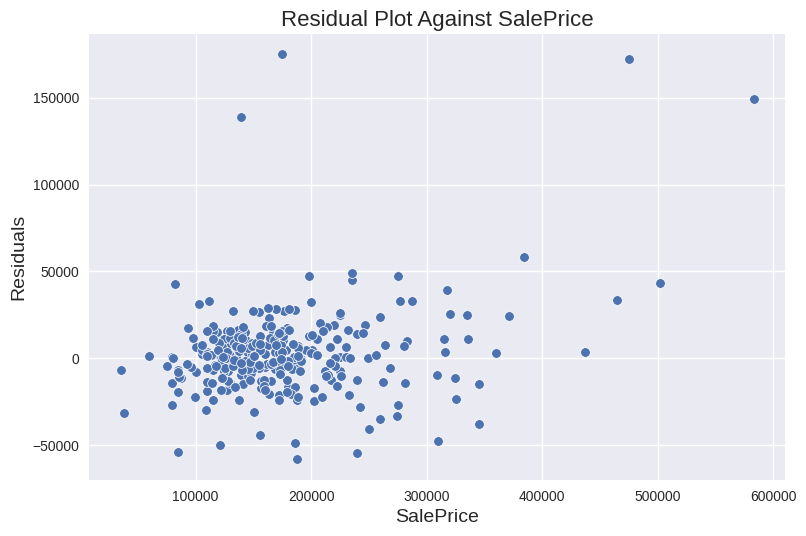

In [ ]:
# Residual plots

plt.style.use("seaborn")

residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(y_test), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

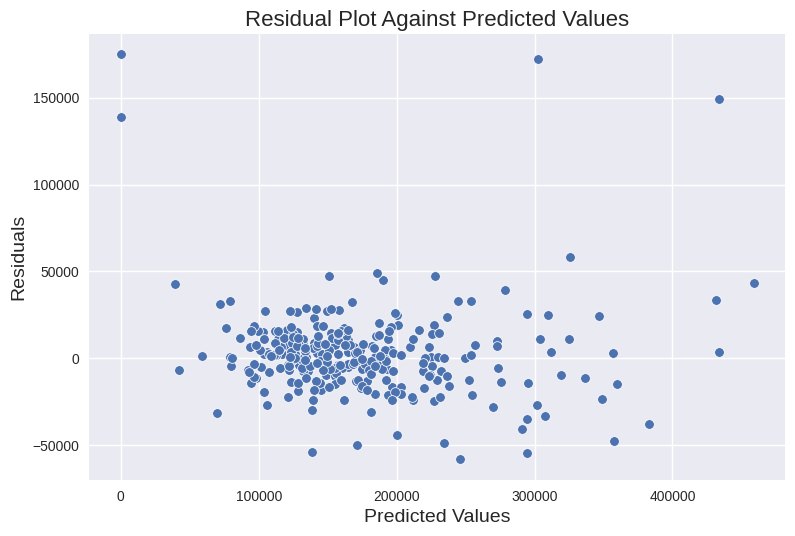

In [ ]:
# Residual plots
plt.style.use("seaborn")
residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(predictions), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against Predicted Values", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

### **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_name = "RandomForest"

# Build a Random Forest model
rand_for = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the transformed and selected training data
rand_for.fit(X_train_transformed_fs, y_train)

# Predict using the model on the transformed and selected test data
predictions = rand_for.predict(X_test_transformed_fs)

# Function call to Evaluate results of 'MAE', 'MSE', 'RMSE', 'R-squared'
evaluation_results = evaluation(y_test, predictions)

#RMSE for cross-validation
rf_rmse_cross_val = np.mean(np.sqrt(-cross_val_score(rand_for, X_train_transformed_fs, y_train, scoring="neg_mean_squared_error")))

evaluation_results["Model"] = model_name
evaluation_results["RMSE (Cross-Validation)"] = rf_rmse_cross_val

models = pd.DataFrame([evaluation_results])

print('-'*30)
print("Evaluation Results for", model_name)
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

------------------------------
Evaluation Results for RandomForest
MAE: 0.09597986122926094
MSE: 0.019348070631704593
RMSE: 0.13909734228842977
R-squared: 0.8700521188418993
Model: RandomForest
RMSE (Cross-Validation): 0.13794555172863454


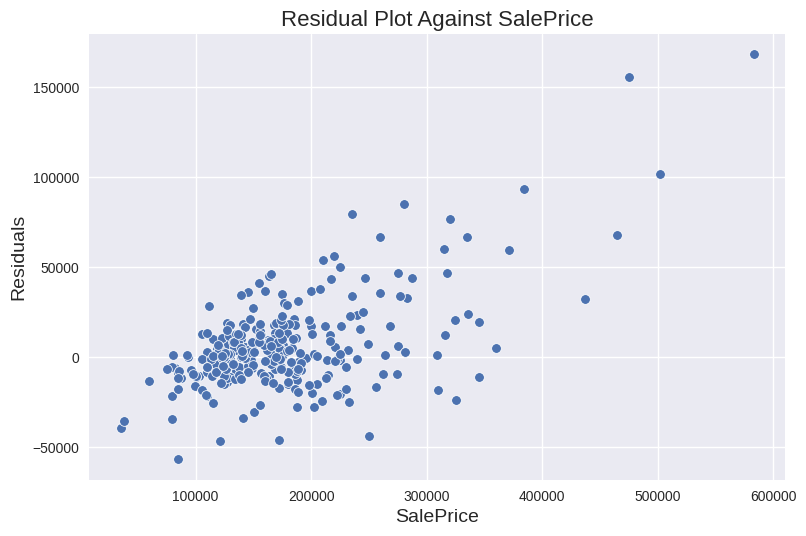

In [ ]:
# Residual plots

plt.style.use("seaborn")

residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(y_test), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

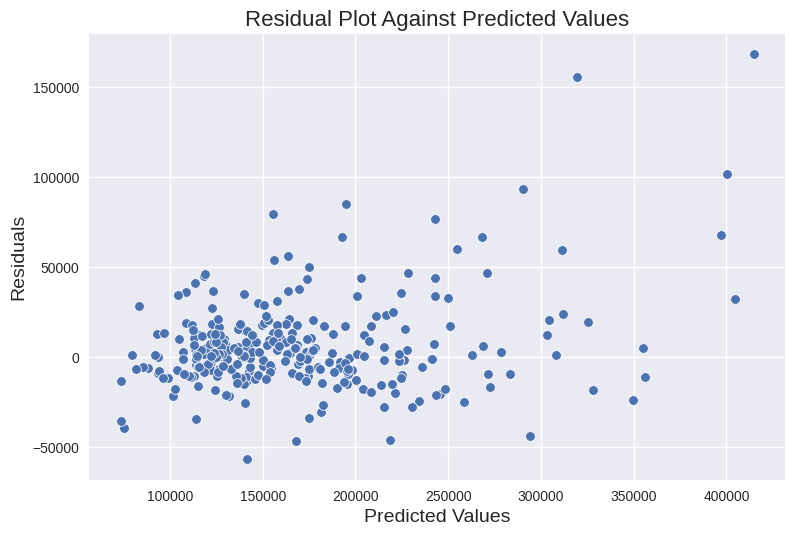

In [ ]:
# Residual plots
plt.style.use("seaborn")
residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(predictions), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against Predicted Values", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

### **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_name = "GradientBoostingRegressor"

# Build a Gradient Boost model
g_boost = GradientBoostingRegressor(random_state=0)

# Fit the model on the transformed and selected training data
g_boost.fit(X_train_transformed_fs, y_train)

# Predict using the model on the transformed and selected test data
predictions = g_boost.predict(X_test_transformed_fs)

# Function call to Evaluate results of 'MAE', 'MSE', 'RMSE', 'R-squared'
evaluation_results = evaluation(y_test, predictions)

#RMSE for cross-validation
gb_rmse_cross_val = np.mean(np.sqrt(-cross_val_score(g_boost, X_train_transformed_fs, y_train, scoring="neg_mean_squared_error")))

evaluation_results["Model"] = model_name
evaluation_results["RMSE (Cross-Validation)"] = gb_rmse_cross_val

models = pd.DataFrame([evaluation_results])

print("Evaluation Results for", model_name)
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


Evaluation Results for GradientBoostingRegressor
MAE: 0.08621531122345188
MSE: 0.014728411564944258
RMSE: 0.12136066728946515
R-squared: 0.9010792387457626
Model: GradientBoostingRegressor
RMSE (Cross-Validation): 0.12360347982458737


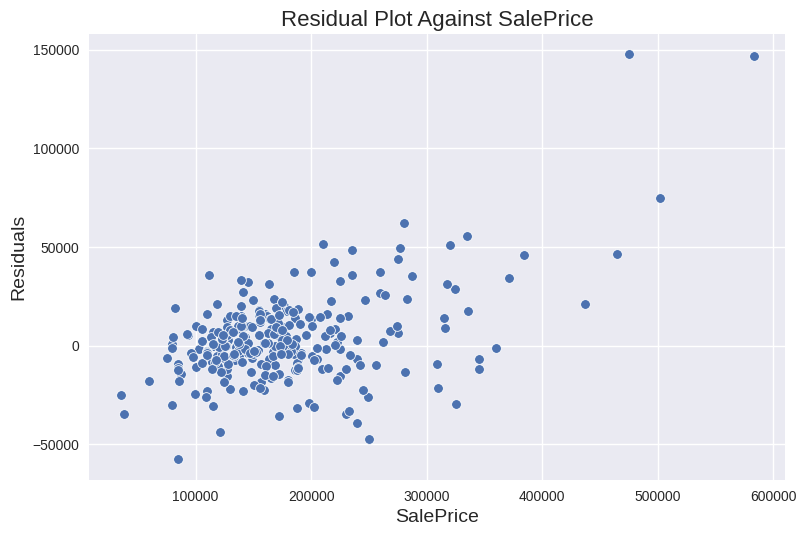

In [ ]:
# Residual plots

plt.style.use("seaborn")

residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(y_test), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

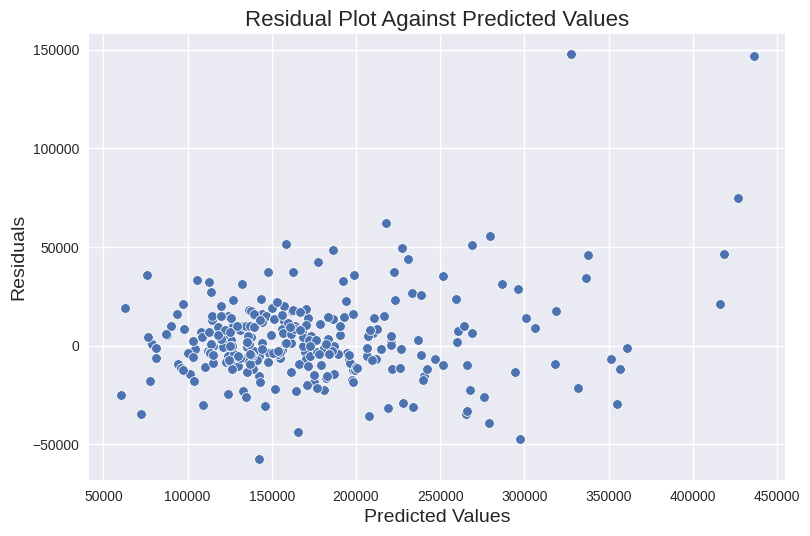

In [ ]:
# Residual plots
plt.style.use("seaborn")
residuals = np.exp(y_test) - np.exp(predictions)

sns.scatterplot(x=np.exp(predictions), y=residuals)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title("Residual Plot Against Predicted Values", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)

plt.show()

**Comparison of models**

In [ ]:
model_results = [
    {"model": "LinearRegression", "RMSE (Cross-Validation)": lr_rmse_cross_val},
    {"model": "RandomForestRegressor", "RMSE (Cross-Validation)": rf_rmse_cross_val},
    {"model": "XGBRegressor", "RMSE (Cross-Validation)": gb_rmse_cross_val}]

In [ ]:
#sort models according to there results
sorted_results = sorted(model_results, key=lambda x: x["RMSE (Cross-Validation)"])

# Print the sorted results
for result in sorted_results:
    print(result)

{'model': 'XGBRegressor', 'RMSE (Cross-Validation)': 0.12360347982458737}
{'model': 'RandomForestRegressor', 'RMSE (Cross-Validation)': 0.13794555172863454}
{'model': 'LinearRegression', 'RMSE (Cross-Validation)': 33971912972.161682}


In [ ]:
model_names = [model["model"] for model in model_results]
rmse_values = [model["RMSE (Cross-Validation)"] for model in model_results]

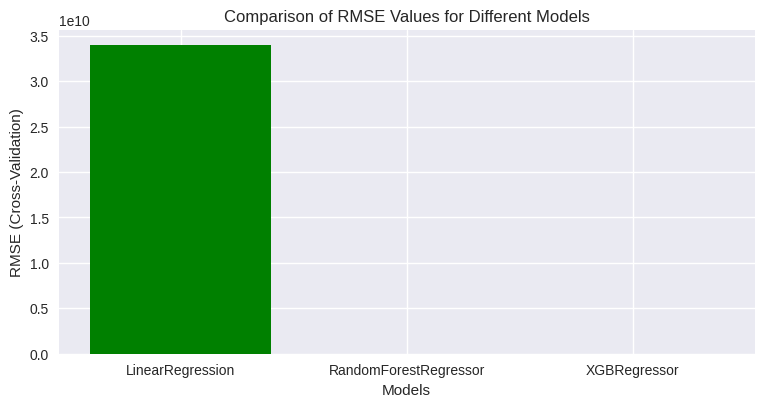

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, rmse_values, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('RMSE (Cross-Validation)')
plt.title('Comparison of RMSE Values for Different Models')
plt.show()

The results are clear that linear regression model is not giving good performance as its RMSE (Cross-Validation) is way larger than other models and other both models are pretty much close to the results.

### **Predictions on Test Data**
- Now its time to test our best model on the (test data)

In [ ]:
# transform the test data to have the same selected features as the training data
#because the sequential nature of the model makes it more sensitive to the number of features used in training and prediction
X_test_selected = fs.transform(test_data)

#transformed and origional results
y_pred = np.exp(g_boost.predict(X_test_selected))
y_pred

array([228317.18659655, 277407.08163975, 274210.20297833, ...,
       244165.92915418, 238685.34948628, 335846.16576125])